# Análise dos Resultados da Previsão de Engajamento - Classificação

In [1]:
#@title Importações de pacote
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from util import load_results, filter_dataset

In [2]:
BASE_PATH = 'dados/preprocessed/'
TYPE_NAME = 'all-MiniLM-paraphrase-multilingual'

In [3]:
# ALTERE AQUI !!!
RESULTS_FILE_PATH = "./resultados/resultados50p_2025-03-13-22h44m_bolsonaro(all-MiniLM-paraphrase-multilingual).npy"

# 1 - Carregando Dados

Carregando os dados dos resultados.

In [4]:
metadata, results = load_results(RESULTS_FILE_PATH)

In [5]:
metadata

{'date': '2025-03-13-22h44m',
 'subdataset': 'bolsonaro',
 'target': 'Curtidas-2Classes-50p',
 'random_state': 1231,
 'description': 'Treinamento com modelos com os \ndados balanceados (50p), com o dataset bolsonaro, com todos os modelos \ne com todos os ENSEMBLE, com a correção de escala para a MLP,\nvariando class_weight para os modelos que suportam',
 'basic_models': ['MLP Neural Network',
  'Support Vector Machine',
  'Random Forest',
  'Logistic Regression',
  'KNN']}

Carregando dados brutos.

In [6]:
dfx_full = pd.read_excel(BASE_PATH + 'full-preproc2-inputs_'+ (TYPE_NAME) +'.xlsx', index_col='ID')
dfy_full = pd.read_excel(BASE_PATH + 'full-preproc2-outputs_'+ (TYPE_NAME) +'.xlsx', index_col='ID')

In [7]:
dfx, dfy = filter_dataset(dfx_full, dfy_full, subdataset=metadata['subdataset'], target_col=metadata['target'])

Dataset BOLSONARO (indicador 0)


In [8]:
dfx.columns

Index(['Only Hashtags', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x375', 'x376', 'x377', 'x378', 'x379', 'x380', 'x381', 'x382', 'x383',
       'x384'],
      dtype='object', length=385)

In [9]:
BASIC_MODEL_NAMES = metadata['basic_models']
BASIC_MODEL_NAMES

['MLP Neural Network',
 'Support Vector Machine',
 'Random Forest',
 'Logistic Regression',
 'KNN']

# 2 - Métricas Principais

In [10]:
from ipywidgets import interact

In [11]:
# Modelos disponíveis (básicos e ensemble)
print("Modelos testados:")
results.keys()

Modelos testados:


dict_keys(['MLP Neural Network', 'Support Vector Machine', 'Random Forest', 'Logistic Regression', 'KNN', 'MNN-hard-vote', 'MNN-soft-vote', 'SVM-hard-vote', 'SVM-soft-vote', 'RF-hard-vote', 'RF-soft-vote', 'LR-hard-vote', 'LR-soft-vote', 'K-hard-vote', 'K-soft-vote', 'BPF-hard-vote', 'BPF-soft-vote'])

In [12]:
#METRICS = ['Acurácia_mean', 'Precisão_mean', 'Revocação_mean', 'F1_score_mean', 'aucROC_mean']
METRICS = ['F1_score_mean', 'F1_score_std', 'Precisão_mean', 'Precisão_std', 'Revocação_mean', 'Revocação_std', 'Acurácia_mean', 'Acurácia_std']

In [13]:
df_result = pd.DataFrame(results).T
df_result = df_result[METRICS]

In [14]:
df_result.loc[df_result.index.isin(BASIC_MODEL_NAMES), :].sort_values('F1_score_mean', ascending=False)

,F1_score_mean,F1_score_std,Precisão_mean,Precisão_std,Revocação_mean,Revocação_std,Acurácia_mean,Acurácia_std
Support Vector Machine,0.783836,0.015005,0.748657,0.019272,0.823237,0.024983,0.773165,0.016084
Logistic Regression,0.76423,0.009896,0.745821,0.020672,0.78446,0.020049,0.758093,0.013037
MLP Neural Network,0.755843,0.0174,0.749224,0.019234,0.764399,0.04034,0.753789,0.013739
KNN,0.75377,0.020837,0.751912,0.026242,0.755786,0.01699,0.75307,0.023099
Random Forest,0.753046,0.016347,0.73352,0.028099,0.77444,0.016559,0.745896,0.021287


In [15]:
def order_models_by(order_by):
    display(df_result.sort_values(by=order_by, ascending=False))
    return

interact(order_models_by, order_by=METRICS);

interactive(children=(Dropdown(description='order_by', options=('F1_score_mean', 'F1_score_std', 'Precisão_mea…

**Classificador Aleatório**

In [16]:
from sklearn import metrics

In [17]:
def random_classifier_results(y_true, chance_for_class1=0.5, trials=100):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    for i in range(trials):
        y_pred = np.random.choice([0, 1], size=len(y_true), p=[1.0-chance_for_class1, chance_for_class1])
        accuracies.append(metrics.accuracy_score(y_true, y_pred))
        precisions.append(metrics.precision_score(y_true, y_pred))
        recalls.append(metrics.recall_score(y_true, y_pred))
        f1s.append(metrics.f1_score(y_true, y_pred))
    print(f"RANDOM CLASSIFIER ({100*chance_for_class1:.0f}% chance for class 1)")
    print(f"- Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.5f}") 
    print(f"- Precision: {np.mean(precisions):.4f} +/- {np.std(precisions):.5f}")
    print(f"- Recall: {np.mean(recalls):.4f} +/- {np.std(recalls):.5f}")
    print(f"- F1-Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.5f}")

In [18]:
random_classifier_results(dfy, 0.50)

RANDOM CLASSIFIER (50% chance for class 1)
- Accuracy: 0.5041 +/- 0.03308
- Precision: 0.5020 +/- 0.03341
- Recall: 0.5064 +/- 0.04842
- F1-Score: 0.5036 +/- 0.03825


# 3 - Melhores Hiper-Parâmetros

### 3.1 - Valores de parâmetros mais frequentes entre os melhores, por modelo

In [19]:
from collections import Counter

def aggregate_best_params(model_name):
    best_params_list = results[model_name]['melhores_parametros']
    
    # for each name of parameter, counts the number of times each of its value appeared among the best
    params_count = dict()

    for param_name in best_params_list[0].keys():
        # fora each value of the parameter, counts the occurences
        params_count[param_name] = Counter()
        
        for params in best_params_list:
            if param_name == 'preproc':
                param_value = params[param_name]._simplified_name
            else:
                param_value = params[param_name]
            params_count[param_name][param_value] += 1
    
    display(params_count)

#aggregate_best_params('Logistic Regression')
interact(aggregate_best_params, model_name=BASIC_MODEL_NAMES)

interactive(children=(Dropdown(description='model_name', options=('MLP Neural Network', 'Support Vector Machin…

<function __main__.aggregate_best_params(model_name)>

### 3.2 - Melhores hiperparâmetros por fold (entre todos os modelos)

In [20]:
def list_best_model_per_fold():
    for fold in range(5):   
        best_f1 = 0.0
        best_model_params = None
        best_model_name = None
        for model_name in results.keys():
            # ignora modelos ensemble
            if 'melhores_parametros' not in results[model_name]:
                continue
            
            if results[model_name]['F1_score_list'][fold] > best_f1:
                best_f1 = results[model_name]['F1_score_list'][fold]
                best_model_params = results[model_name]['melhores_parametros'][fold]
                best_model_name = model_name
        
        print(f"FOLD {fold} - best model is a '{best_model_name}' with hiper parameters:")
        for key in best_model_params:
            if key == 'preproc':
                print(f" - {key}: {best_model_params[key]._simplified_name}")
            else:
                print(f" - {key}: {best_model_params[key]}")
        print(f" - F1 score: {results[best_model_name]['F1_score_list'][fold]:.4f}")


list_best_model_per_fold()

FOLD 0 - best model is a 'MLP Neural Network' with hiper parameters:
 - predictor__activation: tanh
 - predictor__hidden_layer_sizes: (64,)
 - predictor__learning_rate_init: 0.001
 - preproc: TargetEncoderX(target_type='continuous',use_log=False)
 - scaler: StandardScaler()
 - F1 score: 0.6538
FOLD 1 - best model is a 'Random Forest' with hiper parameters:
 - predictor__class_weight: None
 - predictor__max_depth: 3
 - predictor__min_samples_split: 4
 - predictor__n_estimators: 30
 - preproc: TargetEncoder(target_type='binary')
 - F1 score: 0.7667
FOLD 2 - best model is a 'Support Vector Machine' with hiper parameters:
 - predictor__C: 0.1
 - predictor__class_weight: balanced
 - predictor__gamma: auto
 - predictor__kernel: rbf
 - preproc: OneHotEncoder(drop='if_binary')
 - scaler: StandardScaler()
 - F1 score: 0.7636
FOLD 3 - best model is a 'Logistic Regression' with hiper parameters:
 - predictor__C: 2.0
 - predictor__class_weight: balanced
 - predictor__penalty: l2
 - preproc: Target

### 3.3 - Melhores hiperparâmetros por modelo (todos os folds)

In [21]:
def list_all_best_params(model_name):
    best_params_list = results[model_name]['melhores_parametros']
    for i, paramset in enumerate(best_params_list):
        print("BEST PARAM SET IN FOLD", i, ":")
        for key in paramset.keys():
            if key == 'preproc':
                print(f" - {key}: {paramset[key]._simplified_name}")
            else:
                print(f" - {key}: {paramset[key]}")
        print(f" - F1 score: {results[model_name]['F1_score_list'][i]:.4f}")


#list_all_best_params('Logistic Regression')
#list_all_best_params('Random Forest')
#list_all_best_params('Support Vector Machine')

interact(list_all_best_params, model_name=BASIC_MODEL_NAMES)

interactive(children=(Dropdown(description='model_name', options=('MLP Neural Network', 'Support Vector Machin…

<function __main__.list_all_best_params(model_name)>

In [22]:
#results["Support Vector Machine"]["melhores_modelos"]

# 4 - Importâncias dos Atributos


- Baseado nos valores de `feature_importances_` calculados em alguns modelos

In [23]:
#@title Definições auxiliares (não precisa abrir)
from sklearn.tree import plot_tree
import numpy as np
import matplotlib.pyplot as plt

def plot_importance(importances, title=None, max_features=None, feature_names=None, sort=True, ax=None):
    """
    Plot feature importances for a scikit-learn random forest or gradient boosting model.

    Parameters
    ----------
    model : object
        A scikit-learn random forest or gradient boosting model.
    title: str or None, optional (default=None)
        The title of the plot.
    max_features : int or None, optional (default=None)
        The maximum number of features to plot. If None, plot all features.
    feature_names : list or None, optional (default=None)
        A list of feature names to use in the plot. If None, use the feature indices.
    sort : bool, optional (default=True)
        Whether to sort the feature importances in descending order.
    ax : matplotlib.axes.Axes or None, optional (default=None)
        The matplotlib axes to plot the feature importances on. If None, create a new figure and axes.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The matplotlib axes containing the plot.

    """
    # Extract feature importances
    #importances = model.feature_importances_

    # Get feature names
    if feature_names is None:
        feature_names = [str(i) for i in range(len(importances))]

    # Sort feature importances
    if sort:
        indices = np.argsort(importances)[::-1]
        importances = importances[indices]
        feature_names = [feature_names[i] for i in indices]

    # Truncate feature importances
    if max_features is not None:
        importances = importances[:max_features]
        feature_names = feature_names[:max_features]

    # Create plot
    if ax is None:
        fig, ax = plt.subplots()
   
    if title:
        ax.set_title(title, fontsize=12)

    ax.barh(np.arange(len(importances)), importances, align='center')
    ax.set_yticks(np.arange(len(importances)))
    ax.set_yticklabels(feature_names)
    #ax.set_xlabel('Gini importance', fontsize=10)
    ax.invert_yaxis()

    return ax

In [24]:
if 'Decision Tree' in results:
    # best model of the 1st fold of the outer cross-validation
    dec_tree_pipeline = results['Decision Tree']['melhores_modelos'][0]

    # fit the pipeline to the WHOLE dataset
    dec_tree_pipeline.fit(dfx, dfy)

    display(dec_tree_pipeline)
    
    # the decision tree model inside the pipeline
    dec_tree = dec_tree_pipeline.named_steps['predictor']
    feature_names = dec_tree_pipeline.named_steps['preproc'].get_feature_names_out()

    fig = plt.figure(figsize=(22,15))
    plot_tree(dec_tree, feature_names=list(feature_names), filled=True);

In [25]:
to_translate = {'cat__': '', 'remainder__': '', 
                    'DiasDecorridos': 'Elapsed Days', 
                    'Dispositivo Retórico': 'Rhetorical Device',
                    'Retórica Aristotélica': 'Aristotelian Rhetoric',
                    'Tipo de conteúdo': 'Content Type',
                    'Texto': 'Text',
                    'Tonalidade': 'Tone',
                    'Duracao': 'Duration',
                    'Abordagem': 'Approach'}

def translate_feature_names(feature_names):
    translated_names = []
    for name in feature_names:
        for k in to_translate.keys():
            name = name.replace(k, to_translate[k])
        translated_names.append(name)
    return translated_names

Mostras as importâncias para CADA um dos 5 modelos (dos 5 folds):

In [26]:
from sklearn.model_selection import StratifiedKFold

O modelo MLP Neural Network não registra as importâncias das features
O modelo Support Vector Machine não registra as importâncias das features
O modelo Logistic Regression não registra as importâncias das features
O modelo KNN não registra as importâncias das features


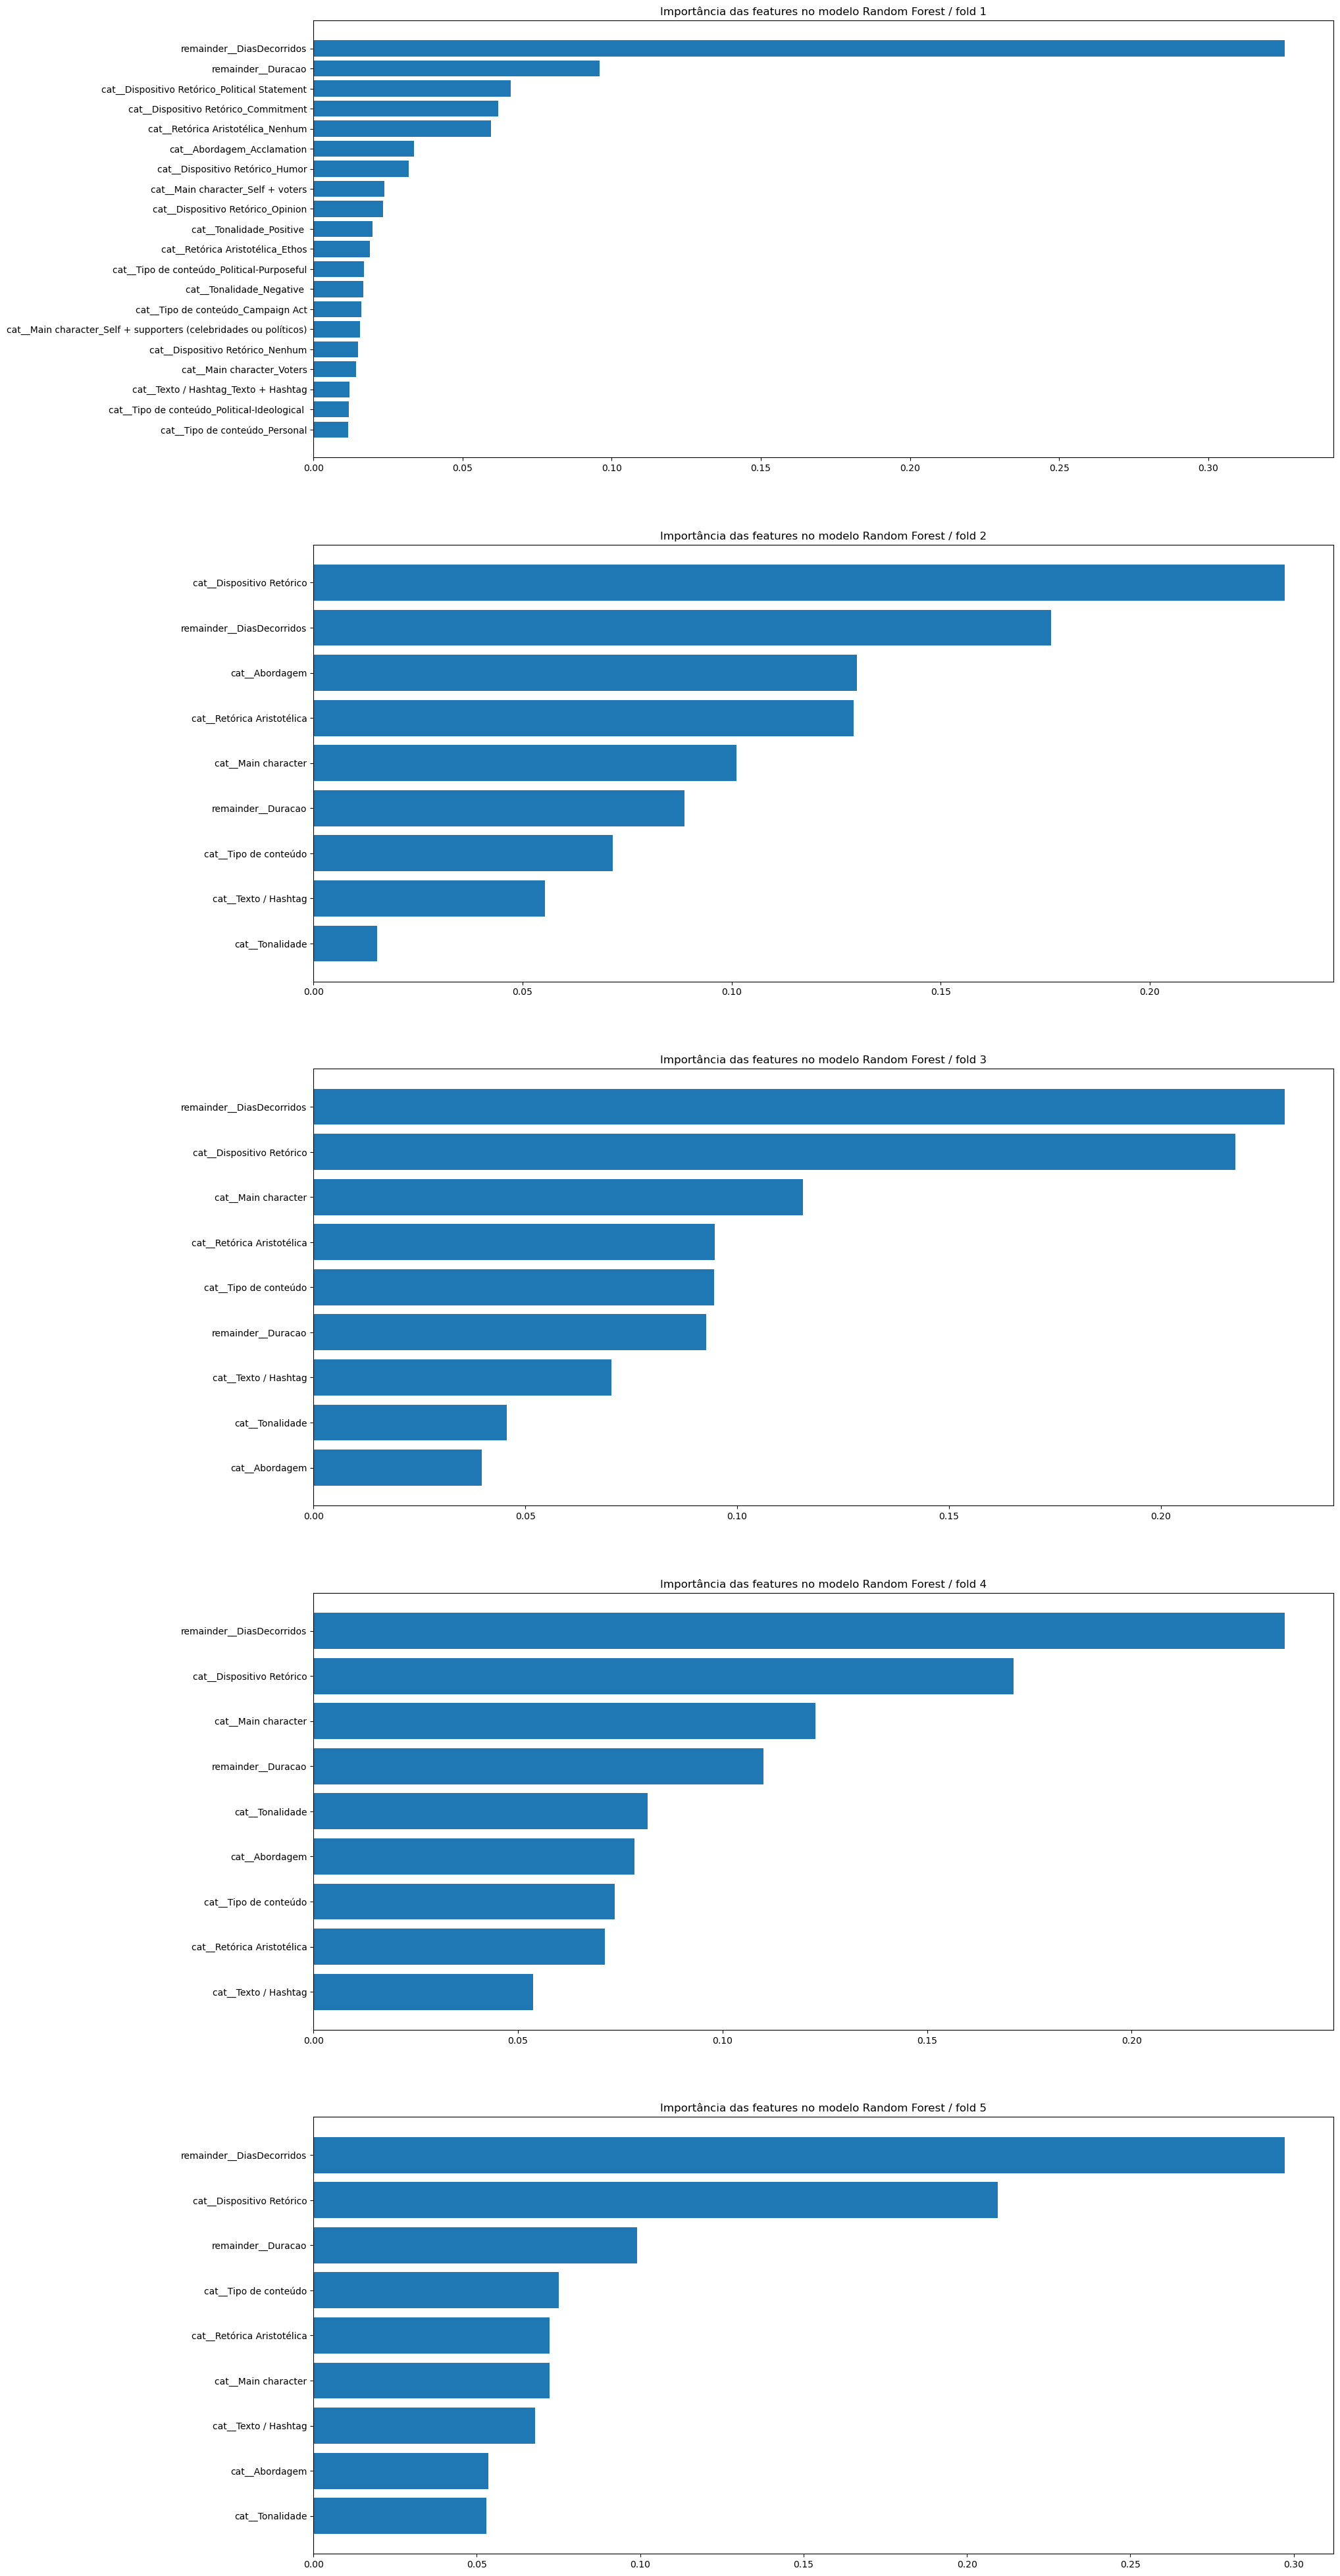

In [27]:
for model_name in results.keys():
    if 'vote' in model_name:
        continue

    model_pipeline = results[model_name]['melhores_modelos'][0]  # the best model found in the first fold
    model_predictor = model_pipeline.named_steps['predictor']

    # testa se o modelo guarda as importâncias das features
    if not hasattr(model_predictor, 'feature_importances_'):
        print(f"O modelo {model_name} não registra as importâncias das features")
        continue

    fig, axs = plt.subplots(5, 1, figsize=(20, 50))
    
    # Configurando a validação cruzada externa (igual à da função de treinamento)
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=metadata['random_state'])

    fold = 0
    for train_ix, test_ix in cv_outer.split(dfx, dfy):
    #for fold in range(5):
        X_train = dfx.iloc[train_ix]
        y_train = dfy.iloc[train_ix]

        model_pipeline = results[model_name]['melhores_modelos'][fold]
        model_predictor = model_pipeline.named_steps['predictor']
        
        model_pipeline.fit(X_train, y_train)
        #model_pipeline.fit(dfx, dfy) # PENSAR: refazer o cv_outer ?

        features = model_pipeline.named_steps['preproc'].get_feature_names_out()
        importances = model_predictor.feature_importances_
        plot_importance(importances, 
                        title=f"Importância das features no modelo {model_name} / fold {fold+1}", 
                        feature_names=features, max_features=20, 
                        ax=axs[fold])
        fold += 1

Mostras as importâncias médias dos modelos agrupadas pelos que usam features semelhantes:

O modelo MLP Neural Network não registra as importâncias das features
O modelo Support Vector Machine não registra as importâncias das features
O modelo Logistic Regression não registra as importâncias das features
O modelo KNN não registra as importâncias das features


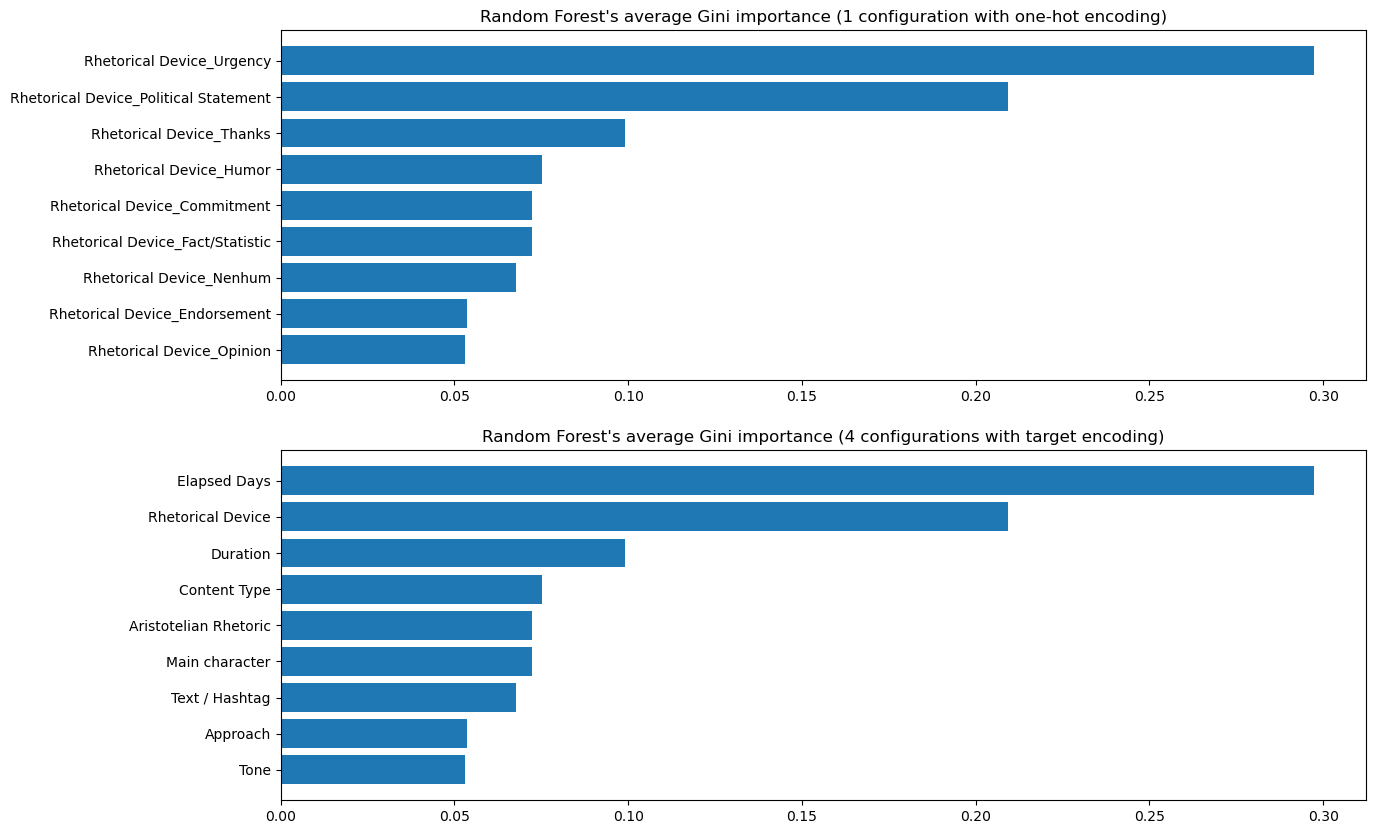

In [28]:
for model_name in results.keys():
    if 'vote' in model_name:
        continue

    model_pipeline = results[model_name]['melhores_modelos'][0]  # the best model found in the first fold
    model_predictor = model_pipeline.named_steps['predictor']

    # testa se o modelo guarda as importâncias das features
    if not hasattr(model_predictor, 'feature_importances_'):
        print(f"O modelo {model_name} não registra as importâncias das features")
        continue

    map_num_features_to_importances = dict()
    
    # groups the models that uses similarly modified features
    for fold in range(5):
        model_pipeline = results[model_name]['melhores_modelos'][fold]
        model_predictor = model_pipeline.named_steps['predictor']
        
        # não precisa, porque já foi treinado na célula anterior
        #model_pipeline.fit(...)

        features = model_pipeline.named_steps['preproc'].get_feature_names_out()

        num_features = len(features)
        #print("Fold", fold, ":", num_features)

        importances = model_predictor.feature_importances_
        assert len(importances) == num_features

        if num_features not in map_num_features_to_importances:
            map_num_features_to_importances[num_features] = []
        
        map_num_features_to_importances[num_features].append((features, importances))

    # plot the importances for each group of models
    num_groups = len(map_num_features_to_importances)
    fig, axs = plt.subplots(num_groups, 1, figsize=(14, 5*num_groups))
    
    for subplot, num_features in enumerate(map_num_features_to_importances.keys()):
        list_of_importances = map_num_features_to_importances[num_features]
        num_models = len(list_of_importances)
        
        # just to assure that the feature names are the same
        # across the different model configurations
        for j in range(len(list_of_importances)-1):
            assert (list_of_importances[j][0] == list_of_importances[j+1][0]).all()

        features = list_of_importances[0][0]
        features = translate_feature_names(features)
        mean_importances = np.mean([imp for (_, imp) in list_of_importances], axis=1)
        
        if num_groups > 1:
            param_ax = axs[subplot]
        else:
            param_ax = axs
        
        # ATENÇÃO: isso se aplica aos modelos com dados apenas de Lula ou apenas de Bolsonaro (o geral deve ter 43 features)
        cat_feature_encoding = 'one-hot encoding' if len(features)==42 else 'target encoding'
        letter_s_if_plural   = 's' if num_models > 1 else ''

        plot_importance(importances, 
                        title=f"Random Forest's average Gini importance ({num_models} configuration{letter_s_if_plural} with {cat_feature_encoding})", 
                        feature_names=features, 
                        max_features=20, 
                        ax=param_ax)


-----

# FIM